# Cousera Recommendation system

## 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## 2. Loading Data and Analyzing

In [6]:
df = pd.read_csv(r'C:\Users\SANTOSH VELGAPURI\Downloads\CourseraDataset-Clean.csv')

In [7]:

df

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Introducción al curso, Control de acceso y seg...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0,30
8366,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, Resource, Causality","Course Orientation, Nested If/Else Part 1, Nes...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0,0
8367,Cómo combinar y analizar datos complejos,0.0,Not specified,Flexible schedule,Not specified,Not specified,"Estimación básica, Modelos, Vinculación de reg...","Richard Valliant, Ph.D.","University of Maryland, College Park",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0,0
8368,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,"Introdução ao curso, Operações do Kubernetes, ...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0,0


In [8]:
# Display the first few rows of the dataset
df.head(10)

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582
5,So You Think You Know Tango?,4.6,Beginner level,Flexible schedule,Gain an appreciation for the Argentine Tango a...,Not specified,Module 1: The Many Dimensions of Tango and Tan...,Kristin Wendland,Emory University,Arts and Humanities,https://www.coursera.org/learn/tango,5.0,107
6,The Politics of Skepticism,4.5,Intermediate level,Flexible schedule,Not specified,Not specified,"Political Origins, Skepticism and Religion, Sk...","Tim De Mey, Wiep van Bunge",Erasmus University Rotterdam,Arts and Humanities,https://www.coursera.org/learn/erasmus-philoso...,13.0,38
7,Становлення сучасної України,0.0,Beginner level,Flexible schedule,Not specified,Not specified,Становлення сучасної України,Timothy Snyder,Yale University,Arts and Humanities,https://www.coursera.org/learn/the-making-of-m...,23.0,0
8,Exploring Beethoven's Piano Sonatas Part 4,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Welcome to Class!, Op. 2, No. 2, Op. 10, No. 3...",Jonathan Biss,Curtis Institute of Music,Arts and Humanities,https://www.coursera.org/learn/exploring-beeth...,5.0,63
9,悖论：思维的魔方,4.8,Beginner level,Flexible schedule,Not specified,Not specified,"预备知识和悖论概述, 上帝悖论和连锁悖论, 芝诺悖论和无穷之谜, 逻辑-集合论悖论和语义悖论...",陈波,Peking University,Arts and Humanities,https://www.coursera.org/learn/bei-lun,44.0,39


In [9]:
# Display the last few rows of the dataset
df.tail(10)

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
8360,Felicidad y Políticas Públicas,0.0,Beginner level,Flexible schedule,Conocer las características de los conceptos d...,"Democracia, Ciudadanía, Políticas públicas, Fe...",Explorando los conceptos de felicidad y políti...,Graciela Tonon,Universidad de Palermo,Social Sciences,https://www.coursera.org/learn/felicidad-y-pol...,13.0,0
8361,Teaching Impacts of Technology: Workplace of t...,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Course Orientation, Getting a Job in New Ways,...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/teach-impacts-t...,12.0,0
8362,Teaching Impacts of Technology: Relationships,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Course Orientation, Keeping Connected in a Glo...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/teach-impacts-t...,10.0,0
8363,Computational Thinking for K-12 Educators: Abs...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, belief, aunt","Course Orientation, Abstractions Part 1, Abstr...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,9.0,0
8364,L’engagement efficace de la société civile dan...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,Module 1 : Introduction à un engagement effica...,Sanne Huesken,Erasmus University Rotterdam,Social Sciences,https://www.coursera.org/learn/engagement-effi...,13.0,0
8365,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Introducción al curso, Control de acceso y seg...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0,30
8366,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, Resource, Causality","Course Orientation, Nested If/Else Part 1, Nes...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0,0
8367,Cómo combinar y analizar datos complejos,0.0,Not specified,Flexible schedule,Not specified,Not specified,"Estimación básica, Modelos, Vinculación de reg...","Richard Valliant, Ph.D.","University of Maryland, College Park",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0,0
8368,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,"Introdução ao curso, Operações do Kubernetes, ...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0,0
8369,Visualizing static networks with R,0.0,Intermediate level,Hands-on learning,Learn to preprocess raw data to create nodes a...,"Network Analysis, igraph, R Programming, Graph...",Learn step-by-step,You (Lilian) Cheng,Coursera Project Network,Social Sciences,https://www.coursera.org/projects/visualizing-...,2.0,0


In [10]:
# Summary statistics
df.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


In [11]:
#display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

In [12]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (8370, 13)


In [13]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64


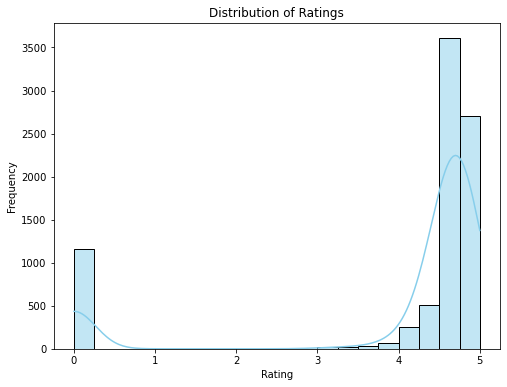

In [14]:
# Rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

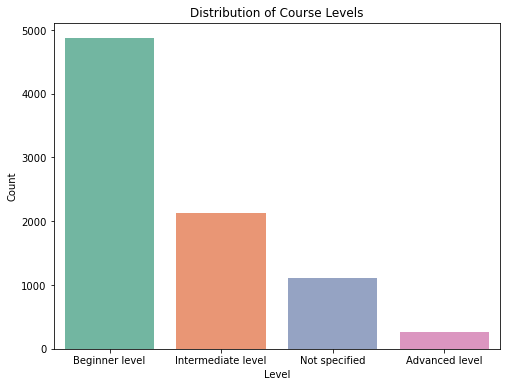

In [15]:
# Level analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Level', palette='Set2')
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

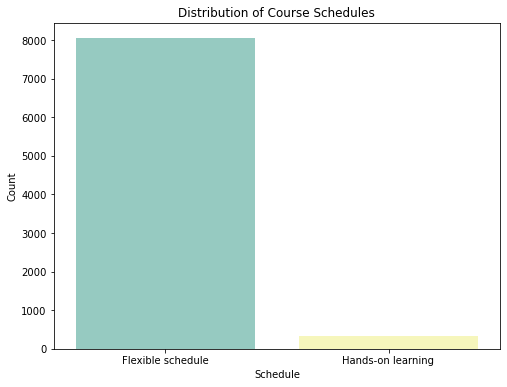

In [16]:
# Schedule analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Schedule', palette='Set3')
plt.title('Distribution of Course Schedules')
plt.xlabel('Schedule')
plt.ylabel('Count')
plt.show()

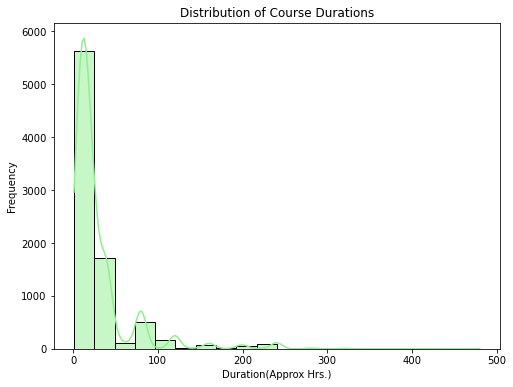

In [17]:
# Duration analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration to complete (Approx.)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Course Durations')
plt.xlabel('Duration(Approx Hrs.)')
plt.ylabel('Frequency')
plt.show()

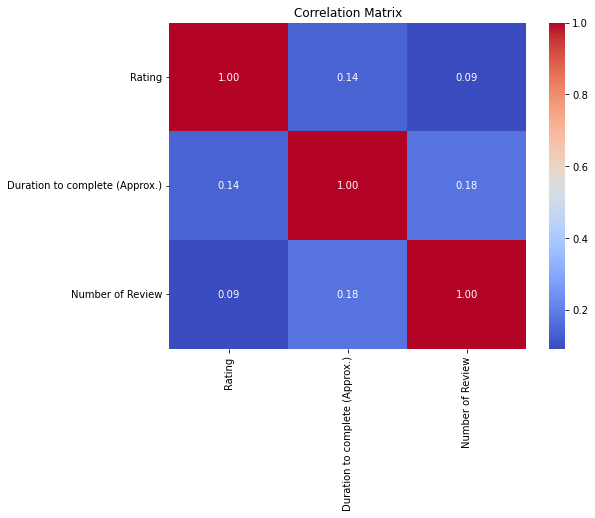

In [18]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

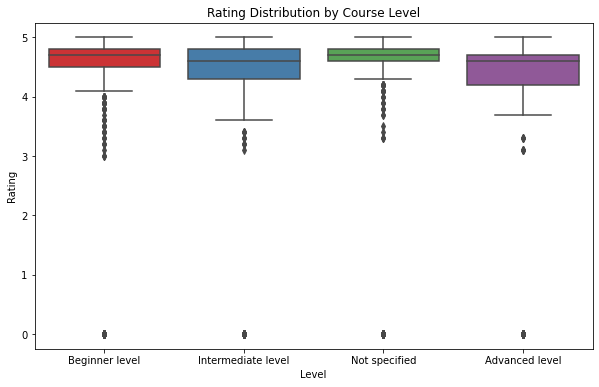

In [19]:
#Rating analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Level', y='Rating', palette='Set1')
plt.title('Rating Distribution by Course Level')
plt.xlabel('Level')
plt.ylabel('Rating')
plt.show()


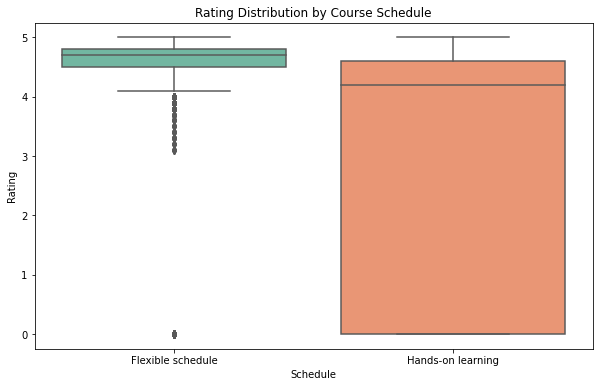

In [20]:
#Rating Distribution by course schedule
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Schedule', y='Rating', palette='Set2')
plt.title('Rating Distribution by Course Schedule')
plt.xlabel('Schedule')
plt.ylabel('Rating')
plt.show()


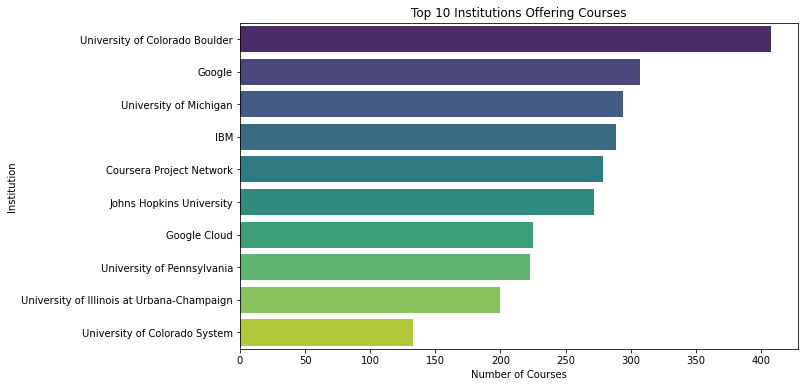

In [21]:
#Top Institutions Offering Courses: Identify the institutions that offer the most courses.

top_institutions = df['Offered By'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_institutions.values, y=top_institutions.index, palette='viridis')
plt.title('Top 10 Institutions Offering Courses')
plt.xlabel('Number of Courses')
plt.ylabel('Institution')
plt.show()


In [22]:
df['Level'].value_counts()

Beginner level        4871
Intermediate level    2131
Not specified         1106
Advanced level         262
Name: Level, dtype: int64

In [23]:
df['Rating'].value_counts()

4.8    1931
4.7    1858
0.0    1163
4.6    1099
4.9     708
4.5     651
4.4     316
4.3     191
4.2     131
4.1      77
5.0      68
4.0      40
3.9      39
3.8      26
3.7      14
3.3      13
3.4      11
3.6      10
3.5       8
3.1       7
3.2       6
3.0       3
Name: Rating, dtype: int64

In [24]:
df['Offered By'].value_counts()

University of Colorado Boulder                                     408
Google                                                             307
University of Michigan                                             294
IBM                                                                289
Coursera Project Network                                           279
                                                                  ... 
EDHEC Business School, Société Générale                              1
École des Ponts ParisTech, BCG                                       1
Talend                                                               1
University of California, Irvine, Tecnológico de Monterrey           1
University of Arizona, University of Florida, Drexel University      1
Name: Offered By, Length: 395, dtype: int64

In [25]:
df['Course Title']

0                                       Fashion as Design
1                                  Modern American Poetry
2                               Pixel Art for Video Games
3         Distribución digital de la música independiente
4       The Blues: Understanding and Performing an Ame...
                              ...                        
8365    Architecting with Google Kubernetes Engine: Pr...
8366    Computational Thinking for K-12 Educators: Nes...
8367             Cómo combinar y analizar datos complejos
8368    Architecting with Google Kubernetes Engine: Wo...
8369                   Visualizing static networks with R
Name: Course Title, Length: 8370, dtype: object

# Required Columns for System
Important columns to be used in recommendation system :

Course Title : Names of the courses

What you will learn : Similar courses may have similar course description

Skill gain : Users may want to see courses based on same skills

Level : Similar courses as per difficulty level

Keyword : keywords or tags associated with the course

# Columns not used for the recommendation system
Rating : Numerical Column; Ratings can sometimes become a biased factor and distribution is not even

Offered By : Same university might offer multiple courses in different domains which the user might not want to see

Course Url : No significance in the recommendation system

In [26]:
df.head(2)

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100


In [27]:
df = df[['Course Title','Level','What you will learn','Skill gain','Keyword']]

In [28]:
df.head(5)

,Course Title,Level,What you will learn,Skill gain,Keyword
0,Fashion as Design,Beginner level,Not specified,"Art History, Art, History, Creativity",Arts and Humanities
1,Modern American Poetry,Beginner level,Not specified,Not specified,Arts and Humanities
2,Pixel Art for Video Games,Beginner level,Not specified,Not specified,Arts and Humanities
3,Distribución digital de la música independiente,Beginner level,Not specified,Not specified,Arts and Humanities
4,The Blues: Understanding and Performing an Ame...,Beginner level,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation",Arts and Humanities


## 3. Data Pre-Processing
An important part of the process is to pre-process the data into usable format for the recommendation system

In [29]:
print(df.columns)

Index(['Course Title', 'Level', 'What you will learn', 'Skill gain',
       'Keyword'],
      dtype='object')


In [30]:
# Removing spaces between the words and other characters using .loc accessor
df.loc[:, 'Course Title'] = df['Course Title'].str.replace(' ',',')
df.loc[:, 'Course Title'] = df['Course Title'].str.replace(',,',',')
df.loc[:, 'Course Title'] = df['Course Title'].str.replace(':','')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace(' ',',')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace(',,',',')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace('_','')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace(':','')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace('(','')
df.loc[:, 'What you will learn'] = df['What you will learn'].str.replace(')','')

df.loc[:, 'Keyword'] = df['Keyword'].str.replace(' and ',',')



In [31]:
df.head(5)

,Course Title,Level,What you will learn,Skill gain,Keyword
0,"Fashion,as,Design",Beginner level,"Not,specified","Art History, Art, History, Creativity","Arts,Humanities"
1,"Modern,American,Poetry",Beginner level,"Not,specified",Not specified,"Arts,Humanities"
2,"Pixel,Art,for,Video,Games",Beginner level,"Not,specified",Not specified,"Arts,Humanities"
3,"Distribución,digital,de,la,música,independiente",Beginner level,"Not,specified",Not specified,"Arts,Humanities"
4,"The,Blues,Understanding,and,Performing,an,Amer...",Beginner level,"Students,will,be,able,to,describe,the,blues,as...","Music, Chord, Jazz, Jazz Improvisation","Arts,Humanities"


## 4. Tags Column
The tags column is the combination of the following columns : Course Title + Level + What you will learn + Skill gain

In [32]:
# Joining specified columns using comma separator
df['tags'] = df.apply(lambda row: ','.join([str(row['Course Title']), str(row['Level']), str(row['What you will learn']), str(row['Skill gain']),str(row['Keyword'])]), axis=1)


In [33]:
df.head(5)

,Course Title,Level,What you will learn,Skill gain,Keyword,tags
0,"Fashion,as,Design",Beginner level,"Not,specified","Art History, Art, History, Creativity","Arts,Humanities","Fashion,as,Design,Beginner level,Not,specified..."
1,"Modern,American,Poetry",Beginner level,"Not,specified",Not specified,"Arts,Humanities","Modern,American,Poetry,Beginner level,Not,spec..."
2,"Pixel,Art,for,Video,Games",Beginner level,"Not,specified",Not specified,"Arts,Humanities","Pixel,Art,for,Video,Games,Beginner level,Not,s..."
3,"Distribución,digital,de,la,música,independiente",Beginner level,"Not,specified",Not specified,"Arts,Humanities","Distribución,digital,de,la,música,independient..."
4,"The,Blues,Understanding,and,Performing,an,Amer...",Beginner level,"Students,will,be,able,to,describe,the,blues,as...","Music, Chord, Jazz, Jazz Improvisation","Arts,Humanities","The,Blues,Understanding,and,Performing,an,Amer..."


In [34]:
df['tags'].iloc[1]

'Modern,American,Poetry,Beginner level,Not,specified,Not specified,Arts,Humanities'

## 5. Dataframe to be used

In [35]:
new_df = df[['Course Title','tags']]

In [36]:
new_df.head(5)

,Course Title,tags
0,"Fashion,as,Design","Fashion,as,Design,Beginner level,Not,specified..."
1,"Modern,American,Poetry","Modern,American,Poetry,Beginner level,Not,spec..."
2,"Pixel,Art,for,Video,Games","Pixel,Art,for,Video,Games,Beginner level,Not,s..."
3,"Distribución,digital,de,la,música,independiente","Distribución,digital,de,la,música,independient..."
4,"The,Blues,Understanding,and,Performing,an,Amer...","The,Blues,Understanding,and,Performing,an,Amer..."


In [37]:
new_df = df[['Course Title','tags']]

In [38]:
new_df['tags'] = df['tags'].str.replace(',',' ')

In [39]:
new_df['Course Title'] = df['Course Title'].str.replace(',',' ')

In [40]:
new_df.rename(columns = {'Course Title':'course_title'}, inplace = True)

In [41]:
new_df['tags'] = df['tags'].apply(lambda x:x.lower()) #lower casing the tags column

In [42]:
new_df.head(5)

,course_title,tags
0,Fashion as Design,"fashion,as,design,beginner level,not,specified..."
1,Modern American Poetry,"modern,american,poetry,beginner level,not,spec..."
2,Pixel Art for Video Games,"pixel,art,for,video,games,beginner level,not,s..."
3,Distribución digital de la música independiente,"distribución,digital,de,la,música,independient..."
4,The Blues Understanding and Performing an Amer...,"the,blues,understanding,and,performing,an,amer..."


In [43]:
new_df.shape

(8370, 2)

## 6. Text Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [46]:
vectors = cv.fit_transform(new_df['tags']).toarray()

## 7. Stemming Process

In [47]:
import nltk #for stemming process

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
#defining the stemming function
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [50]:
new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column

## 8. Similarity Measure

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
similarity = cosine_similarity(vectors)
#similarity

## 9. Recommendation Function

In [53]:
def recommend(course):
    course_index = new_df[new_df['course_title'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]

    for i in course_list:
        print(new_df.iloc[i[0]].course_title)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Define and apply stemming
ps = PorterStemmer()
def stem(text):
    return " ".join(ps.stem(word) for word in text.split())

df['tags'] = df['tags'].apply(stem)

# Create TF-IDF vectors
vectors = tfidf.fit_transform(df['tags']).toarray()
similarity = cosine_similarity(vectors)

In [56]:
def better_recommend(course_query):
    # Find course indices matching the query partially
    match_indices = [i for i, title in enumerate(new_df['course_title']) if course_query.lower() in title.lower()]

    if not match_indices:
        print("No courses found. Try another search.")
        return

    # Retrieve most similar courses for each found index
    recommended_courses = set()
    for idx in match_indices:
        distances = similarity[idx]
        # Get top 6 matches, including the course itself
        for i, score in sorted(enumerate(distances), key=lambda x: x[1], reverse=True)[0:10]:
            recommended_courses.add(new_df.iloc[i]['course_title'])

    for course in recommended_courses:
        print(course)




In [57]:
better_recommend('Pixel')

Pixel Art for Video Games
悖论：思维的魔方
Art for Games Specialization
Character Design for Video Games
Art and the Digital Transformation
World Design for Video Games
Concept Art for Video Games
游戏产业概论
Становлення сучасної України
Low Poly Art For Video Games


In [58]:
recommend('Pixel Art for Video Games')

Concept Art for Video Games
Low Poly Art For Video Games
Character Design for Video Games
Art for Games Specialization
World Design for Video Games
Art and the Digital Transformation


In [59]:
recommend('Fashion as Design')

What Is Contemporary Art?
Modern Art & Ideas
Wonders of Ancient Egypt
Introduction to Ancient Egypt and Its Civilization
In the Studio Postwar Abstract Painting
Applied Public History Places People Stories


In [60]:
recommend('Visualizing static networks with R')

Social Network Analysis
Applied Social Network Analysis in Python
Applied Social Network Analysis in Python
Social and Economic Networks Models and Analysis
Social and Economic Networks Models and Analysis
Social and Economic Networks Models and Analysis


### 10 Creating GUI Using Tkinter

In [61]:
!pip install nltk scikit-learn



In [ ]:
import tkinter as tk
from tkinter import simpledialog, messagebox, scrolledtext

# Tkinter GUI setup
root = tk.Tk()
root.title("Course Recommendation System")



def get_recommendations():
    course_query = entry.get()
    if not course_query:
        messagebox.showinfo("Input needed", "Please enter a course title to get recommendations.")
        return

    match_indices = [i for i, title in enumerate(new_df['course_title']) if course_query.lower() in title.lower()]
    if not match_indices:
        messagebox.showinfo("No match", "No courses found with that title. Try another search.")
        return

    recommended_courses = set()
    for idx in match_indices:
        distances = similarity[idx]
        indices = sorted(range(len(distances)), key=lambda j: distances[j], reverse=True)[1:6]
        recommended_courses.update(new_df.iloc[index]['course_title'] for index in indices if distances[index] > 0.1)

    result_text.delete(1.0, tk.END)
    if recommended_courses:
        recommended_courses=list(recommended_courses)
        result_text.insert(tk.END, "Top Recommendations:\n")
        for i, course in enumerate(recommended_courses[:7], 1):
            result_text.insert(tk.END, f"{i}. {course}\n")
        if len(recommended_courses)>7:
            result_text.insert(tk.END, "\nOther Recommendations:\n")
            for i, course in enumerate(recommended_courses[7:], 1):
                result_text.insert(tk.END, f"{i+7}. {course}\n")
    else:
        result_text.insert(tk.END, "No similar courses found.")

# Widgets
entry = tk.Entry(root, width=60)
entry.pack(padx=20, pady=20)

button = tk.Button(root, text="Get Recommendations", command=get_recommendations)
button.pack(pady=10)

result_text = scrolledtext.ScrolledText(root, width=80, height=25)
result_text.pack(padx=20, pady=20)

root.mainloop()
  

